In [ ]:
# correction with fastMNN

In [2]:
library(Seurat)
library(batchelor)
library(SingleCellExperiment)
library(scran)
library(scater)

In [3]:
# list of stages and samples
stages = rep(c('stage14', 'stage17', 'stage21'), each = 3)
samples = paste0('sample', c('4', '7', '8A', '3_Triangle', '5B', '5Y', '1A', '1B', '2'))

In [21]:
id1 = 7
id2 = 8
id3 = 9

# load data
sc1 = readRDS(paste0(stages[id1], '_', samples[id1], '_data.rds'))
sc1$dataset = paste0('s', sub('\\.*sample', '', samples[id1]))

sc2 = readRDS(paste0(stages[id2], '_', samples[id2], '_data.rds'))
sc2$dataset = paste0('s', sub('\\.*sample', '', samples[id2]))

sc3 = readRDS(paste0(stages[id3], '_', samples[id3], '_data.rds'))
sc3$dataset = paste0('s', sub('\\.*sample', '', samples[id3]))

In [22]:
sce1 = SingleCellExperiment(list(counts = sc1@assays$RNA@counts), colData = DataFrame(sc1@meta.data))
sce2 = SingleCellExperiment(list(counts = sc2@assays$RNA@counts), colData = DataFrame(sc2@meta.data))
sce3 = SingleCellExperiment(list(counts = sc3@assays$RNA@counts), colData = DataFrame(sc3@meta.data))

In [23]:
# common genes
universe <- intersect(intersect(rownames(sce1), rownames(sce2)), rownames(sc3))
sce1 <- sce1[universe,]
sce2 <- sce2[universe,]
sce3 <- sce3[universe,]

In [24]:
# log-normalized counts
out <- multiBatchNorm(sce1, sce2, sce3)
sce1 <- out[[1]]
sce2 <- out[[2]]
sce3 <- out[[3]]

In [25]:
# get top 5k HVGs
dec1 <- modelGeneVar(sce1)
dec2 <- modelGeneVar(sce2)
dec3 <- modelGeneVar(sce3)
combined.dec <- combineVar(dec1, dec2, dec3)
chosen.hvgs <- getTopHVGs(combined.dec, n=5000)

In [26]:
combined <- correctExperiments(A=sce1, B=sce2, C=sce3, PARAM=FastMnnParam())

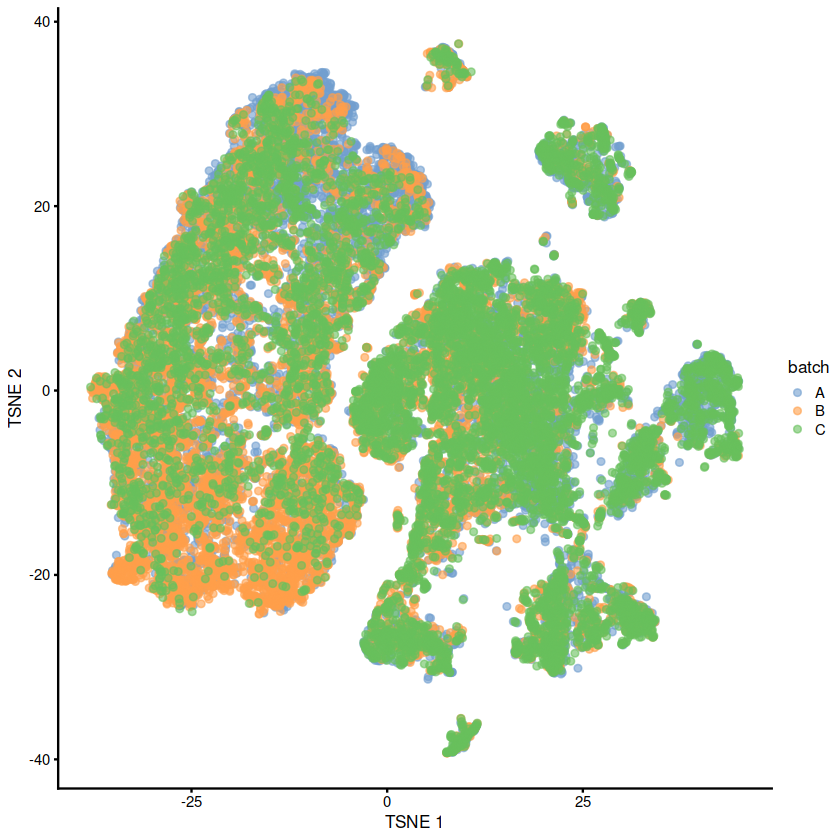

In [27]:
combined <- runTSNE(combined, dimred="corrected")
plotTSNE(combined, colour_by="batch")

# combined <- runUMAP(combined, dimred="corrected")
# plotUMAP(combined, colour_by="batch")

In [28]:
save(combined, file = paste0(stages[id1], '_fastMNN.Rdata'))